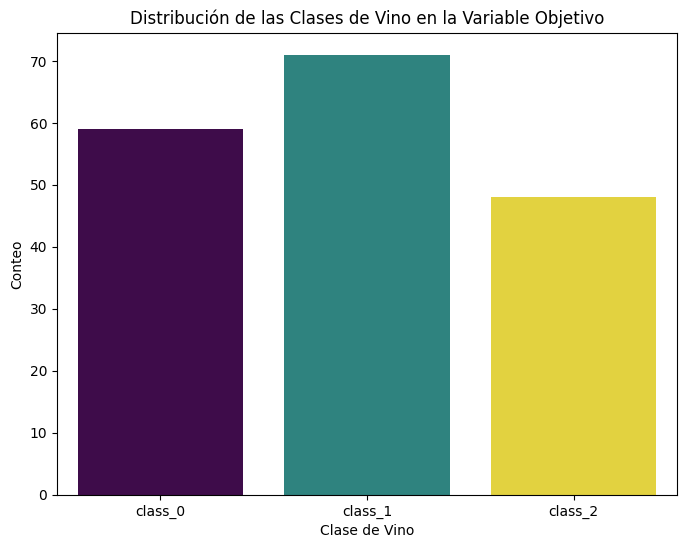

Precisión usando Entropía: 0.9166666666666666
Precisión usando Índice Gini: 0.9444444444444444


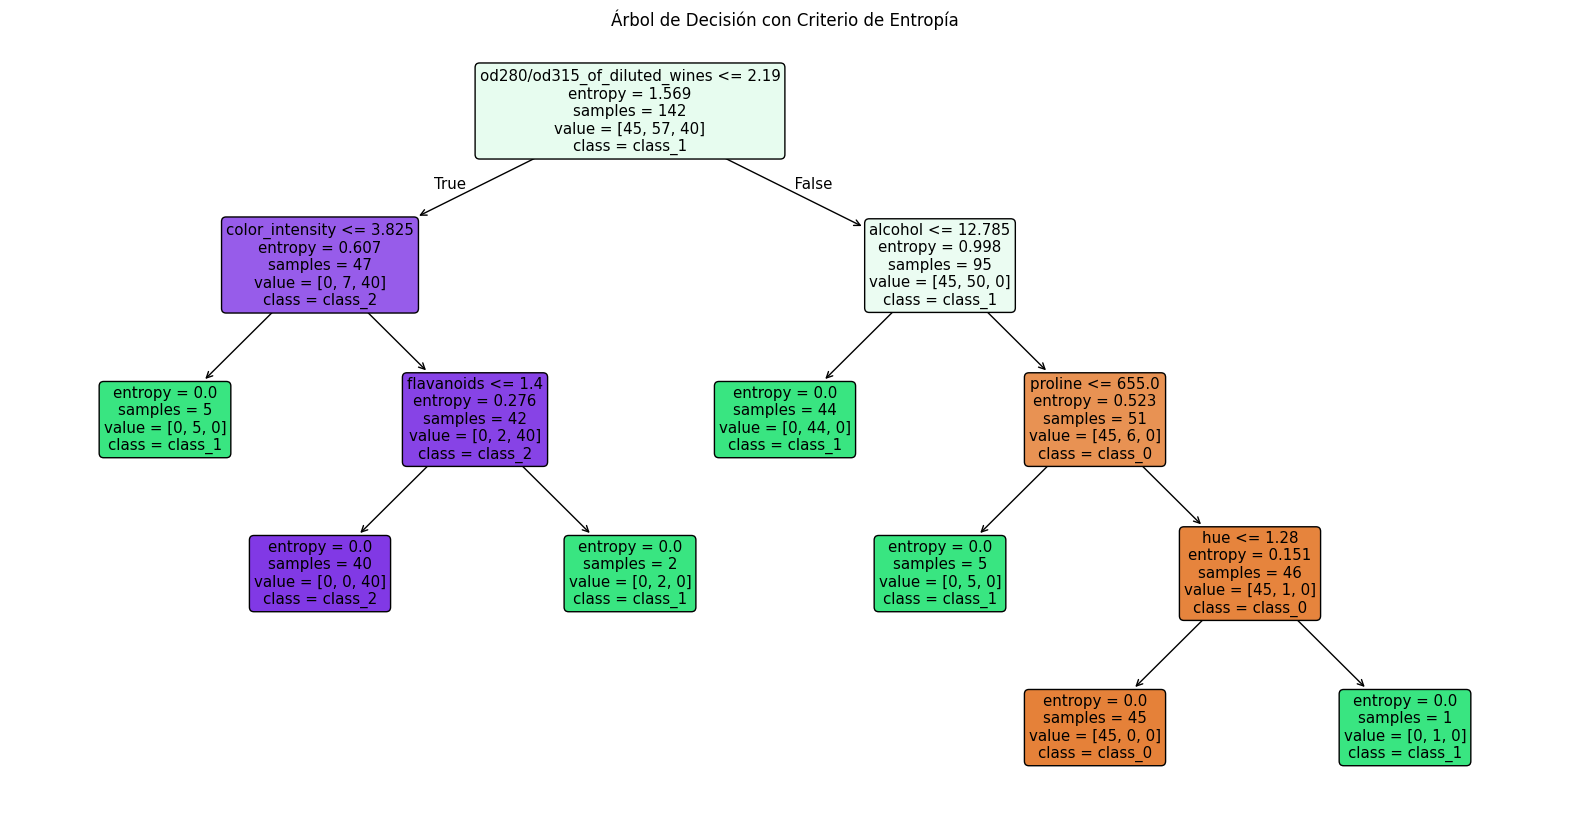

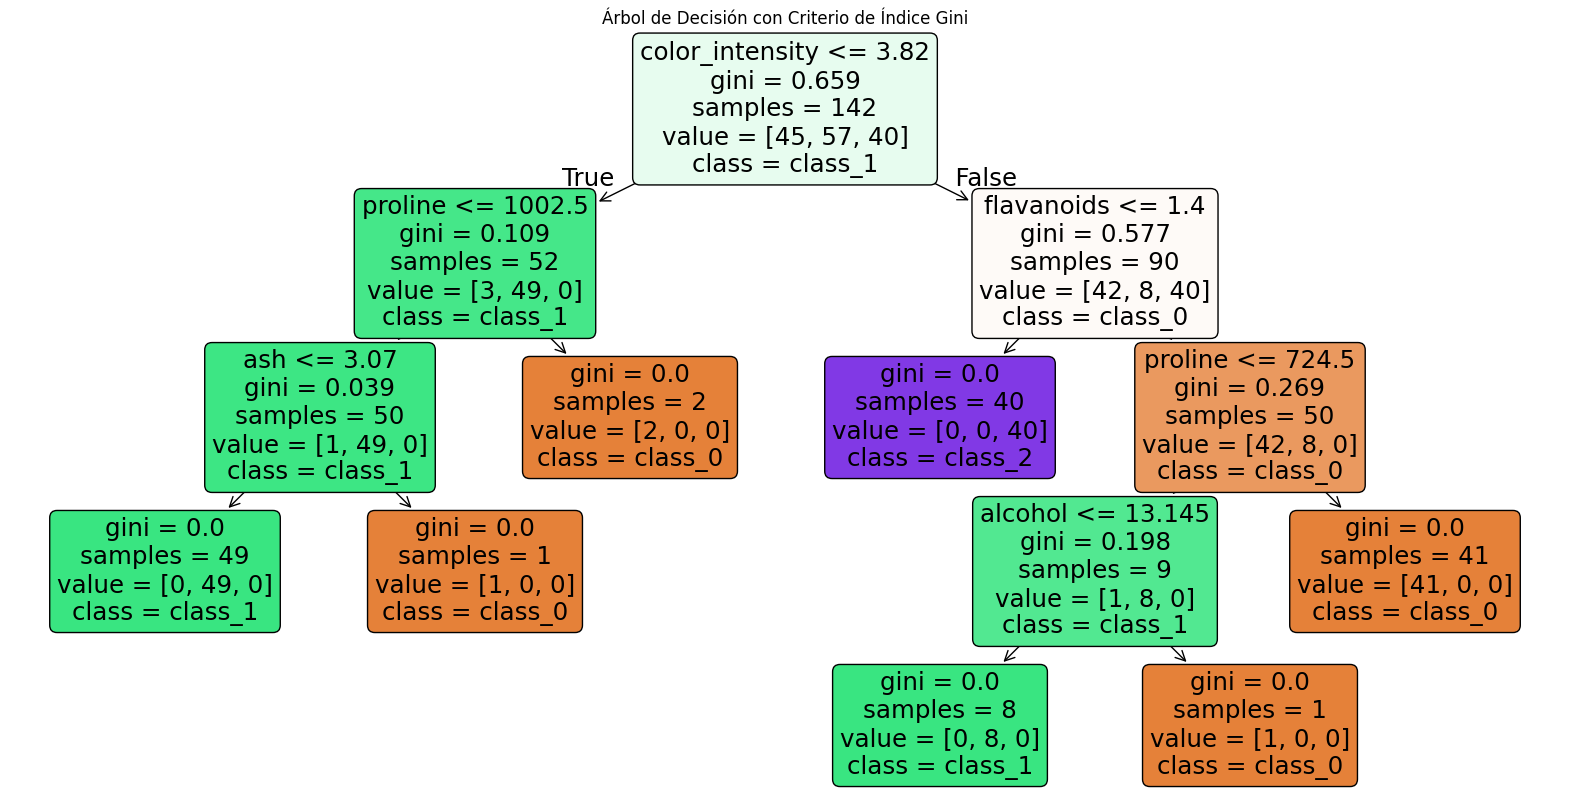

In [5]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el dataset de vinos
wine = load_wine()
X = wine.data
y = wine.target

# Crear un DataFrame para visualizar la variable objetivo
wine_df = pd.DataFrame(X, columns=wine.feature_names)
wine_df['target'] = y

# Visualizar la distribución de la variable objetivo sin advertencia
plt.figure(figsize=(8, 6))
sns.countplot(data=wine_df, x='target', hue='target', palette='viridis', legend=False)
plt.title("Distribución de las Clases de Vino en la Variable Objetivo")
plt.xlabel("Clase de Vino")
plt.ylabel("Conteo")
plt.xticks(ticks=[0, 1, 2], labels=wine.target_names)
plt.show()

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un árbol de decisión con criterio de Entropía
tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_entropy.fit(X_train, y_train)

# Crear y entrenar un árbol de decisión con criterio de Índice Gini
tree_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
tree_gini.fit(X_train, y_train)

# Evaluación de precisión para ambos modelos
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_gini = tree_gini.predict(X_test)

print("Precisión usando Entropía:", accuracy_score(y_test, y_pred_entropy))
print("Precisión usando Índice Gini:", accuracy_score(y_test, y_pred_gini))

# Visualización del árbol con Entropía
plt.figure(figsize=(20, 10))
plot_tree(tree_entropy, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, rounded=True)
plt.title("Árbol de Decisión con Criterio de Entropía")
plt.show()

# Visualización del árbol con Índice Gini
plt.figure(figsize=(20, 10))
plot_tree(tree_gini, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, rounded=True)
plt.title("Árbol de Decisión con Criterio de Índice Gini")
plt.show()


pasos:

Raíz del Árbol:

El nodo raíz está en la parte superior del árbol. La primera decisión se basa en la característica color_intensity <= 3.82.
Si la condición es True (es decir, si la intensidad de color es menor o igual a 3.82), el árbol sigue hacia la izquierda; si es False (mayor a 3.82), sigue hacia la derecha.
Nodos Internos:

Cada nodo contiene información sobre la característica utilizada para dividir, el valor de Gini, el número de muestras en ese nodo, la distribución de las clases en ese nodo, y la clase mayoritaria.
Gini: Un valor más bajo indica un nodo más "puro". Un nodo con gini = 0 significa que todas las muestras en ese nodo pertenecen a la misma clase.
Ejemplo de Interpretación de un Nodo:

Tomemos el nodo a la izquierda del nodo raíz con la condición proline <= 1002.5.
Gini: 0.109, lo cual indica que el nodo está bastante "puro".
Samples: 52, hay 52 muestras en este nodo.
Value: [3, 49, 0], esto representa la distribución de clases: 3 muestras de class_0, 49 de class_1, y 0 de class_2.
Class: class_1, que es la clase mayoritaria en este nodo.
Nodos Hojas:

Los nodos terminales o "hojas" representan las decisiones finales del árbol. Estos nodos no tienen divisiones adicionales.
En cada hoja, el valor de Gini es 0, lo que indica que todas las muestras en ese nodo pertenecen a una sola clase.
Por ejemplo, en el nodo hoja en la parte inferior izquierda, tenemos:
Gini: 0
Samples: 49
Value: [0, 49, 0], lo que significa que todas las 49 muestras pertenecen a class_1.
Class: class_1, que es la clase asignada a este nodo.
Camino de Decisión:

Para clasificar una muestra, el árbol sigue un camino desde la raíz hasta una hoja basándose en las características.
Por ejemplo, si una muestra tiene color_intensity > 3.82, flavanoids <= 1.4, y proline > 724.5, el árbol clasificaría esa muestra en class_0, porque eso lleva a la hoja con value = [41, 0, 0].
Resumen:

Este árbol de decisión clasifica las muestras en tres clases (class_0, class_1, y class_2) basándose en los valores de las características.
Cada división en el árbol se realiza para reducir la impureza del nodo (medida por Gini), dividiendo las muestras de tal manera que se agrupan más homogéneamente en términos de su clase.